<a href="https://colab.research.google.com/github/otario123/MC920/blob/main/Trabalho0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Transformação de Intesidade**

### 1a
Foi utilizado a função do openCV para abrir a imagem em transforma-la em um array numpy.

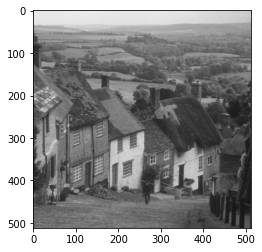

In [27]:
city = cv2.imread("city.png")
plt.imshow(city)

### 1b
Para obter a imagem negativa, fazemos a diferença entre 255 e o número atual do pixel 


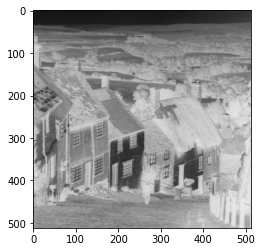

In [28]:
inverted_img = 255 - city
plt.imshow(inverted_img)

### 1c
Para espelhar verticalmente, apenas precisamos copiar inversamente as linhas da imagem original


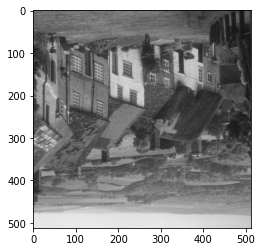

In [29]:
flip_img = city[::-1,:]
plt.imshow(flip_img)


### 1d
Para conversão do intervalo de intensidade de cinza, apenas fazemos uma transformação linear de [0,255] para [0,200].

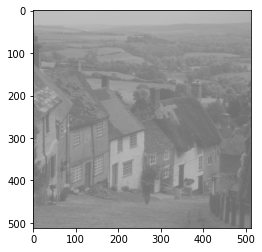

In [30]:
converted_img = np.uint8(np.trunc(city * 0.39 + 100))
plt.imshow(converted_img)

### 1e
Seleciona-se apenas as linhas pares da imagem original para ser modifica, assim podemos inverter as suas colunas.

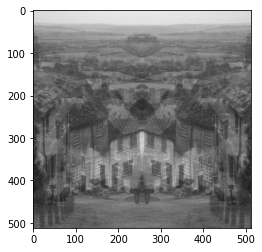

In [31]:
pair_img = city.copy()
pair_img[::2] = pair_img[::2,::-1]
plt.imshow(pair_img)

### 1f
Selecionamos a metade inferior da imagem original para ser modificada, assim copiamos a metade superior invertida.

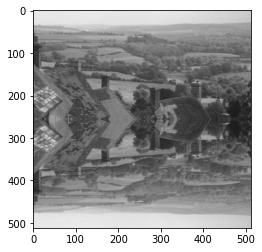

In [40]:
mirror_img = city.copy()
mirror_img[mirror_img.shape[0]//2:] = mirror_img[mirror_img.shape[0]//2-1::-1,:]
plt.imshow(mirror_img)

# **Ajuste de Brilho**
Primeiramente normalizamos a imagem para o intervalo de [0,1], após isso aplicamos a equcação B = A^(1/γ) e após isso convertemos novamente para o intervalo [0,255]

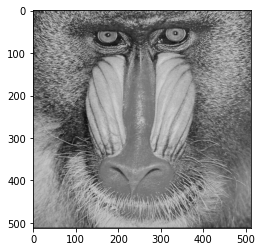

In [33]:
baboon = cv2.imread("baboon.png")
plt.imshow(baboon)

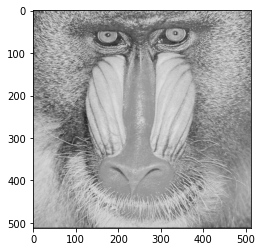

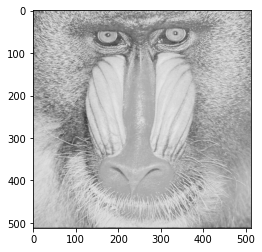

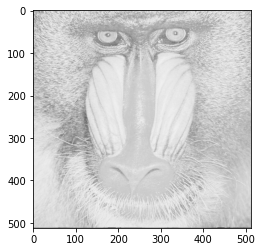

In [34]:
gamas = [1.5,2.,3.5]
for gama in gamas:
  normalize_img = np.uint8(np.power(baboon / 255,1/gama) * 255)
  plt.imshow(normalize_img)
  plt.show()

#**Planos de Bits**

Utilizamos as operações de bitwise para pegar cada plano de bit da imagem e vericar a existencia deste um bit.

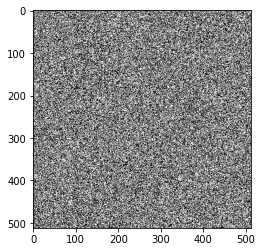

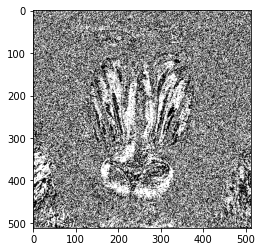

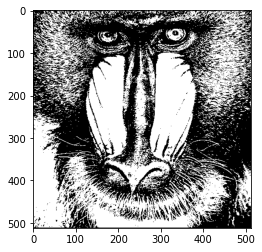

In [49]:
bits = [0,4,7]
for bit in bits:
  bit_img = ((1 << bit) & baboon) /(1<<bit)
  plt.imshow(bit_img)
  plt.show()

# **Mosaico**

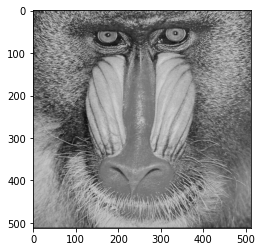

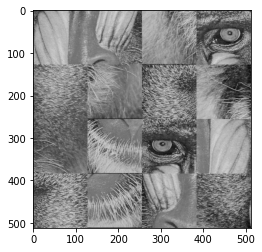

In [45]:
mosaic = []
for linha in range(4):
  for coluna in range(4):
     mosaic.append(baboon[128 * linha: (128 * (linha + 1)):,128 * coluna:(128 * (coluna + 1)):])

formats = [[[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]]
           ,[[5,10,12,2],[7,15,0,8],[11,13,1,6],[3,14,9,4]]]

for format in formats:
  mosaic_img = np.vstack([np.hstack([mosaic[i] for i in linha]) for linha in format])
  plt.imshow(mosaic_img)
  plt.show()

# **Combinação de Imagens**
Podemos combinar duas imagens, fazendo a média ponderada entre seus níveis de cinzas.Dependendo dos valores para o calculo da média ponderada vemos uma maior prevalencia de cada imagem. 

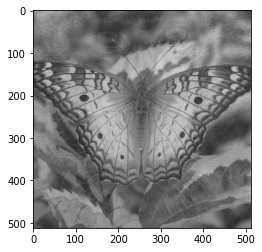

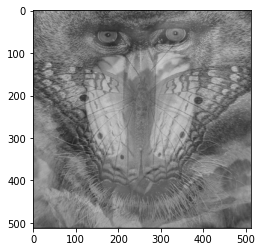

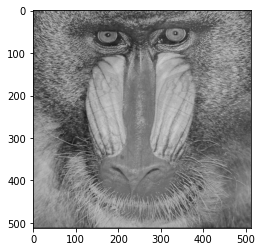

In [37]:
butterfly = cv2.imread("butterfly.png")
combination_params = [(0.2,0.8),(0.5,0.5),(0.8,0.2)]
for params in combination_params:
  combination_img = np.uint8(baboon * params[0] + butterfly * params[1])
  plt.imshow(combination_img)
  plt.show()